# My Jupyter Workflow for basic analysis
## Author: Jorge Anicama

In [1]:
import pandas as pd
from urllib.request import urlretrieve
%matplotlib inline
import matplotlib.pyplot as plt
import os

plt.style.use('seaborn')

# Get the DATA into local filesystem
# https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_myFreemontData(url=URL, filename='mycsv.csv'):
    if not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('mycsv.csv', index_col='Date', parse_dates=True)
    # Add columns shorter header
    data.columns=['West','East']
    # Add a Total column
    data['Total'] = data['West']+data['East']
    return data


In [2]:
data = get_myFreemontData()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [3]:
data.index.date
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)], dtype=object)

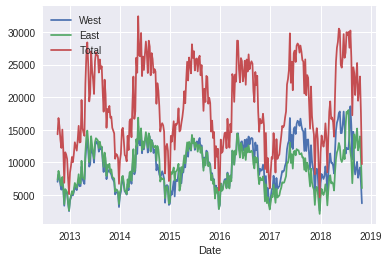

In [4]:
data.resample('W').sum().plot()

(0, 1080850.45)

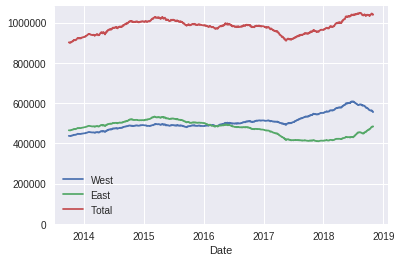

In [5]:
# Rolling last 365 days on each point
ax = data.resample('D').sum().rolling(365).sum().plot()

# show axis 0
ax.set_ylim(0, None)

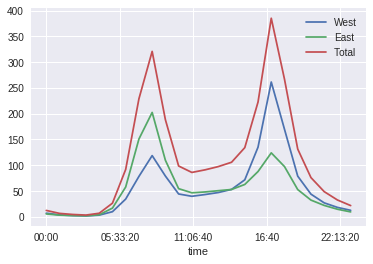

In [6]:
data.groupby(data.index.time).mean().plot()

In [7]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


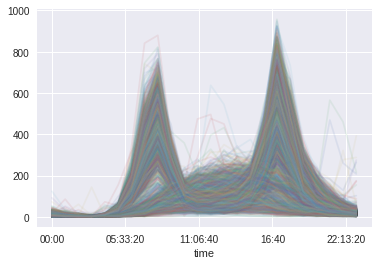

In [8]:
#One line per day
# alpha transparency to visualize all graphs
pivoted.plot(legend=False, alpha=0.1)